### **COVID-19 utilizando imagens de Raio X**
##Modelo Coraline
Copyright 2020 The GooGolPlex Authors.
Licensed under the Apache License, Version 2.0 (the "License");
*   Project: Detecção de COVID-19(coronavirus) a partir de imagens de Raio X do toráx utilizando Redes Neurais Convolucionais.

### Resumo
<pre>

Data Scientist   : Jose R F Junior - web2ajax@gmail.com
Project Name     : Detecção de COVID-19(coronavirus) a partir de imagens de Raio X do toráx utilizando Redes Neurais Convolucionais.
Description      : 1. Detecção do vírus COVID-19 a partir de imagens de re Raio
 X do tórax utilizando uma rede neural convolucional customizada.       

Modelos de segmentação e classificação de imagem de rede neural convolucional 
e modelos de segmentação para diagnosticar distúrbios pulmonares. 
Neste trabalho foram utilizados duas arquiteturas de redes neurais 
convolucionais, InceptionResNetV2 e ResNetX50, com o objetivo de resolver o 
problema de classificação de imagens de raio-x de pessoas com pneumonia.

</pre>

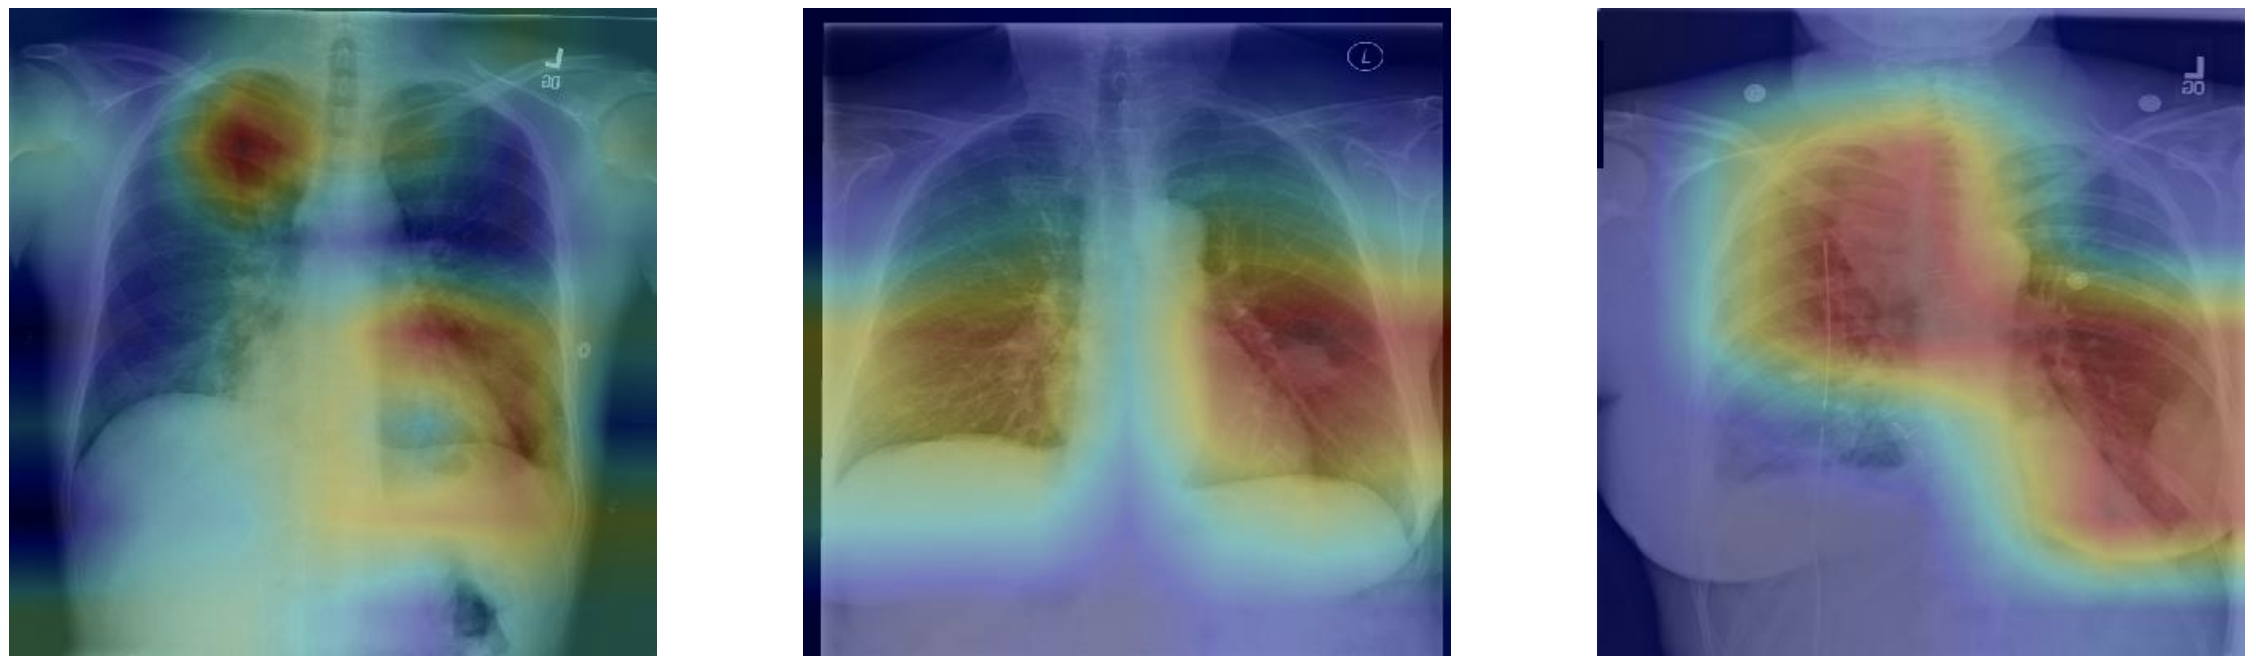

1 - Preparação de dados

2 - Visualizando dados

3 - Prevenção de vazamento de dados

4 - Desenvolvimento de Modelos

5 - Abordando o desequilíbrio de classe Alavancando modelos pré-treinados 

6-  Usando transferência de aprendizado

7 - Avaliação

8 - Curvas AUC e ROC


##Instalando TensoFlow

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions
from keras.models import load_model
from PIL import Image 

from tensorflow.python.keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##Arquitetura

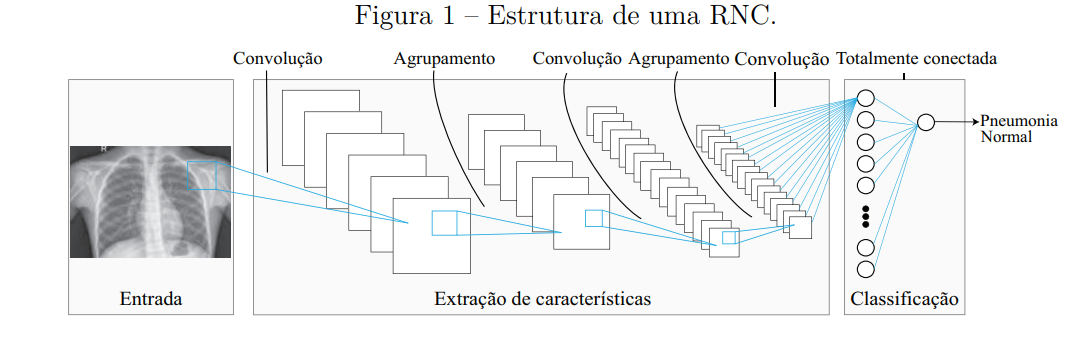

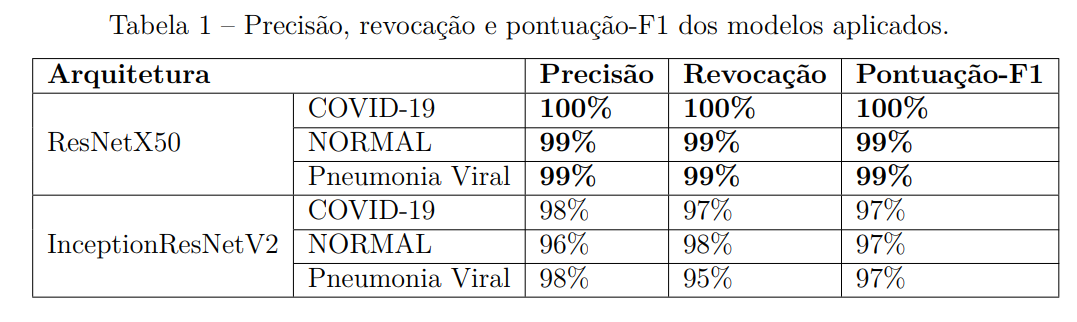

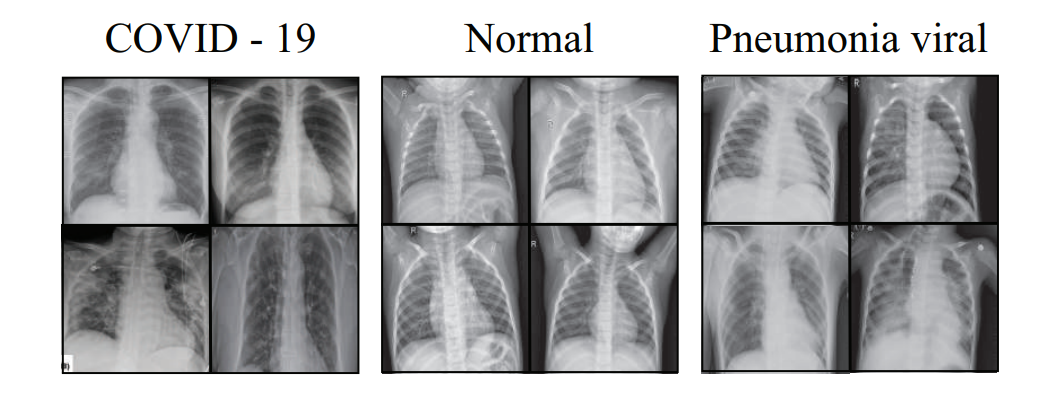

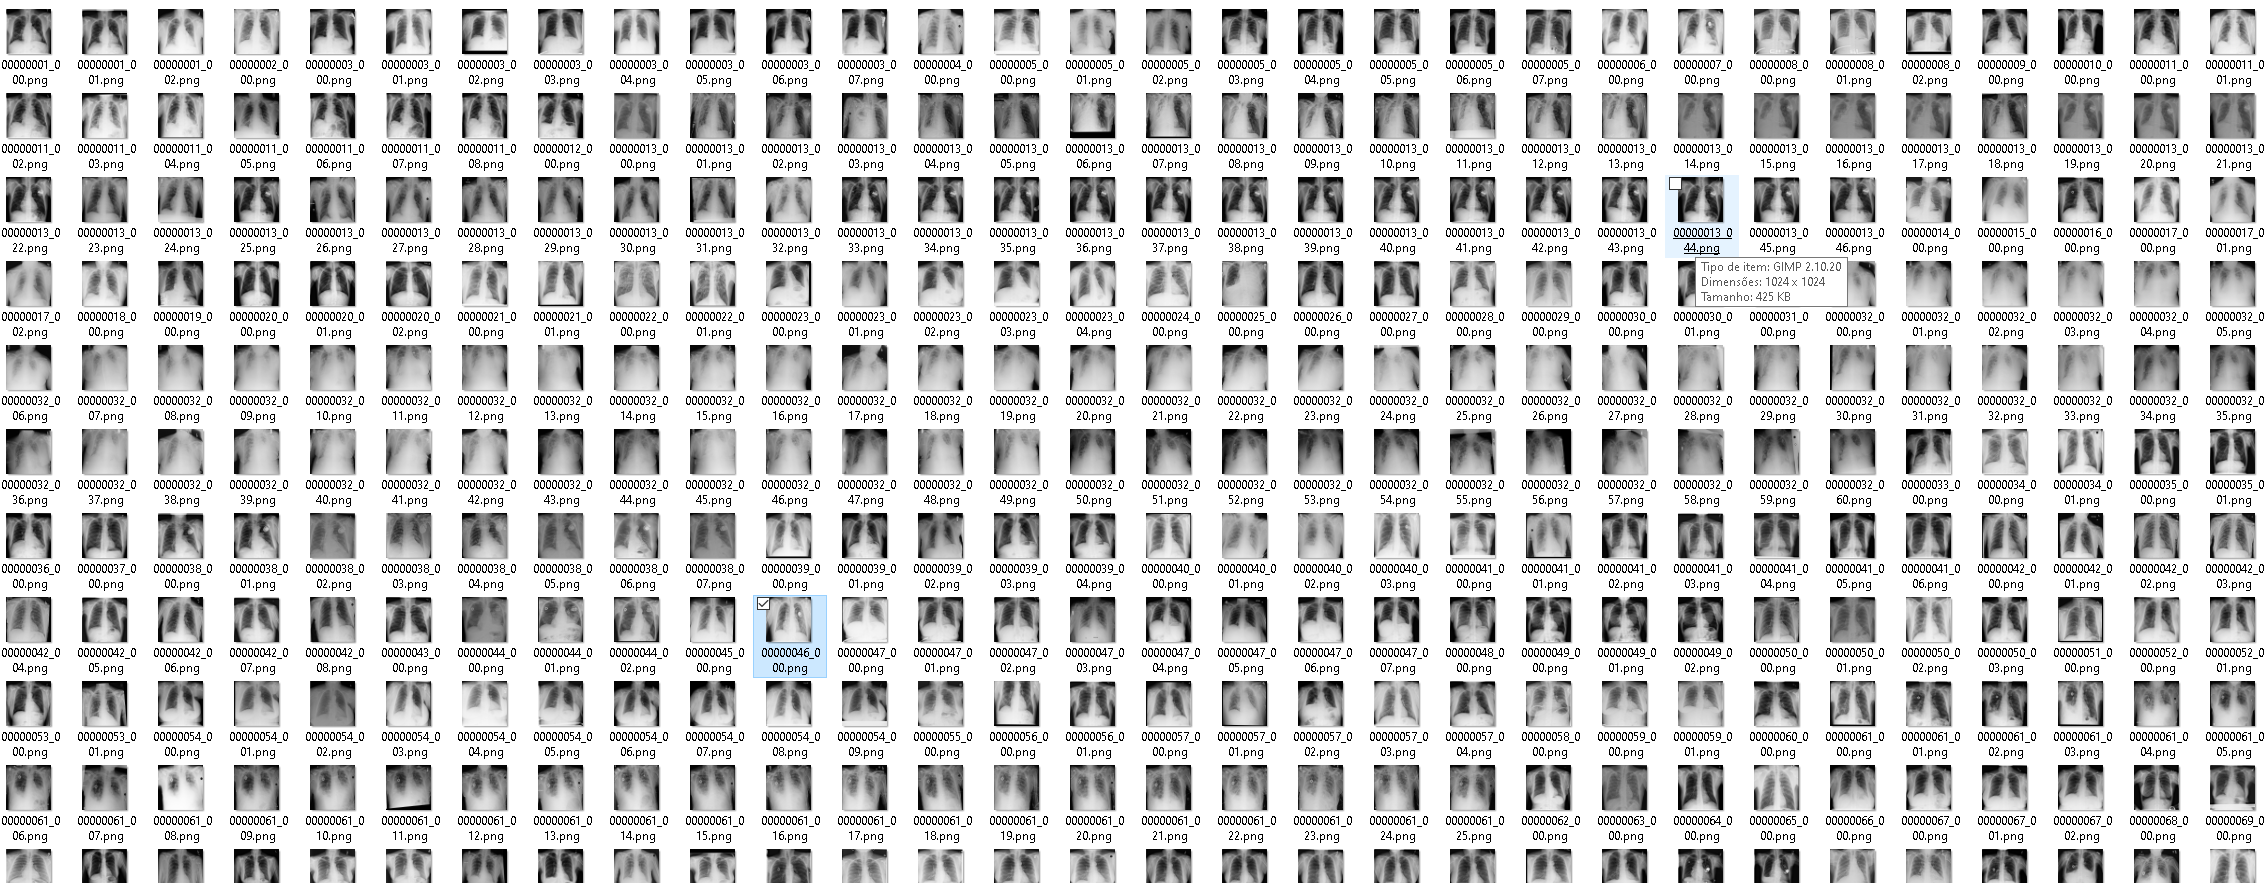

##Baixando os dados

In [ ]:
#Dataset
#https://nihcc.app.box.com/v/ChestXray-NIHCC
#https://github.com/ieee8023/covid-chestxray-dataset
#https://github.com/mlmed/torchxrayvision

In [ ]:
#!wget -c https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz  # 3.6 GB 
#!wget -c https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz  # 3.7 GB
#!wget -c https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz  # 3.7 GB
#!wget -c https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz  # 3.8 GB
#!wget -c https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz  # 3.9 GB
#!wget -c https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz  # 3.7 GB
#!wget -c https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz  # 3.9 GB
#!wget -c https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz  # 3.7 GB
#!wget -c https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz  # 3.7 GB
#!wget -c https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz  # 3.7 GB
#!wget -c https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz  # 3.7 GB
#!wget -c https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz  # 1.9 GB

In [ ]:
os.environ['KAGGLE_USERNAME'] = "juniorosho"
os.environ['KAGGLE_KEY'] = "0d77c9fe1fd290700459161f517b35a2"

In [ ]:
%time !kaggle datasets download -d paultimothymooney/chest-xray-pneumonia #5 seconds

Este conjunto de dados foi anotado por consenso entre quatro radiologistas diferentes para 5 de nossas 14 patologias:

1 - Consolidação

2 - Edema

3 - Efusão

4 - Cardiomegalia

5- Atelectasia

##Tratando as Imagens

Copiando 2 arquivos para GoogleDrive

In [ ]:
!cp /content/drive/My\ Drive/BigData/raio-x/*.*  /content/
!cp /content/drive/My\ Drive/BigData/raio-x/1.gz /content/
!cp /content/drive/My\ Drive/BigData/raio-x/PN.zip /content/

In [ ]:
%time !tar -vzxf 1.gz
%time !unzip x PN.zip
%time !unzip chest-xray-pneumonia.zip #10 seconds

In [ ]:
!apt-get install imagemagick

In [ ]:
!convert /content/images/*.png /content/images/*.jpeg

In [ ]:
os.remove("2.gz") # limpa um pouco o diretório
os.remove("chest-xray-pneumonia.zip") # limpa um pouco o diretório
os.remove("NP.zip") # limpa um pouco o diretório

Descompactando os arquivos

In [ ]:
#Nao tenho disco suficinete para todos os arquivos
#!tar -vzxf /content/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz
#!tar -vzxf /content/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz
#!tar -vzxf /content/f1t00wrtdk94satdfb9olcolqx20z2jp.gz
#!tar -vzxf /content/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz
#!tar -vzxf /content/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz
#!tar -vzxf /content/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz
#!tar -vzxf /content/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz
#!tar -vzxf /content/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz
#!tar -vzxf /content/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz
#!tar -vzxf /content/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz
#!tar -vzxf /content/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz
#!tar -vzxf /content/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz

In [ ]:
def search_dir(type="normal", num=6):
  #Função auxiliar para verificar o conteúdo do diretório
  counter=0

  for file in os.listdir(train_dir + type.upper()+ "/"):
      if counter == num:
          break

      if file.endswith(".jpeg"):
          print(file)

      counter += 1

In [ ]:
def plot_images(type="normal", num=6):
  #Função auxiliar para plotar imagens
  counter=0
  fig = plt.figure(figsize=(10, 8))
  

  for file in os.listdir(train_dir + type.upper()):

      if file.endswith(".jpeg"):
          if counter == num:
              break

          img = mpimg.imread(train_dir + type.upper()+"/"+file)
          plt.subplot(231+counter)
          plt.title(file.split('.')[0])
          imgplot = plt.imshow(img)

          counter += 1

In [ ]:
def display_training_curves(training, validation, title, subplot):
  if subplot%10==1: # configurar as subparcelas na primeira chamada
    plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
    plt.tight_layout()
  ax = plt.subplot(subplot)
  ax.set_facecolor('#F8F8F8')
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['train', 'valid.'])

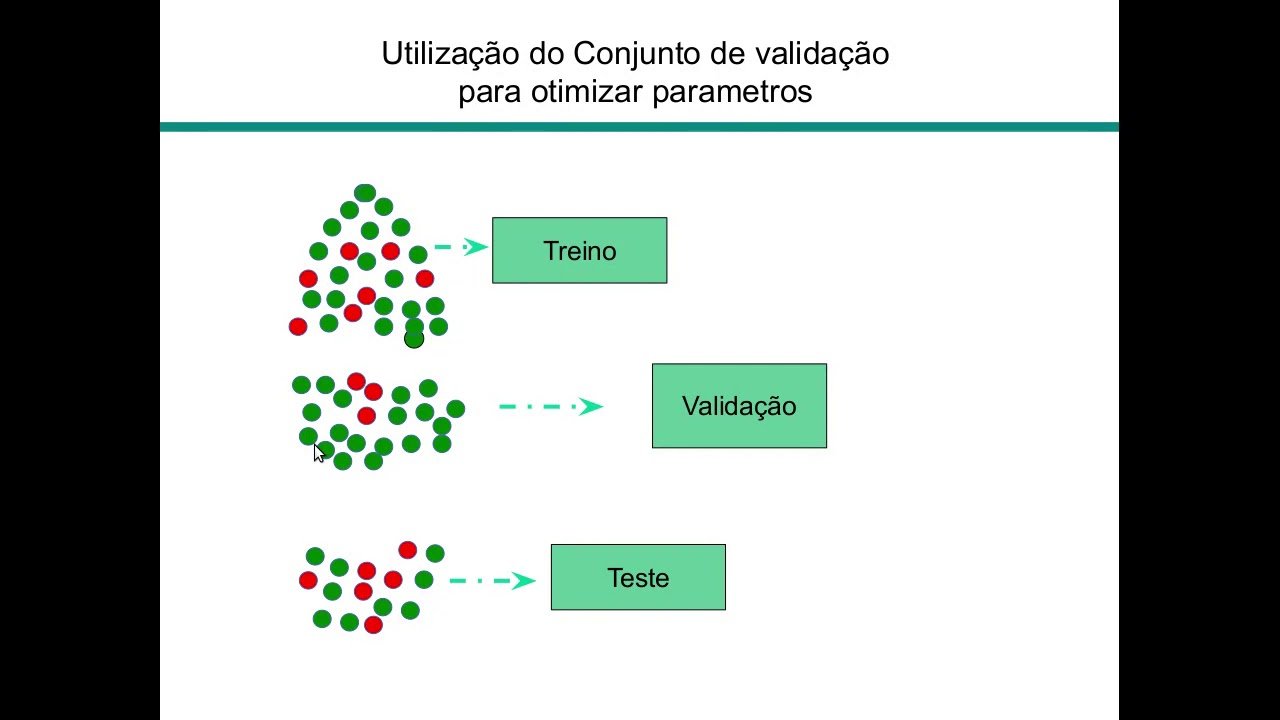

In [ ]:
#Aponte para os diretórios relevantes
train_dir = "chest_xray/train/" #diretórios para treinamento
val_dir   = "chest_xray/test/" #diretórios para teste
test_dir  = "chest_xray/val/" #diretório para pontuação do modelo final

#********** todo: adicionar nessa arquitetura de pasta *************

In [ ]:
!cp -av * /content/raio-x-POSITIVOS/ /content/chest_xray/train/PNEUMONIA/
!cp -av * /content/raio-x-NEGATIVOS/ /content/chest_xray/train/NORMAL/

In [ ]:
search_dir(type="pneumonia", num=10)

In [ ]:
search_dir(type="normal", num=10)

In [ ]:
plot_images(type="pneumonia", num=6)

In [ ]:
plot_images(type="normal", num=6)

##Modelo Pré-Treinado sem Transferência de Aprendizado


ImageNet é um banco de dados de imagens organizado de acordo com a hierarquia 
do WordNet (atualmente apenas os substantivos), no qual cada nó da hierarquia é
 representado por centenas e milhares de imagens
 
http://www.image-net.org/

In [ ]:
pre_model = InceptionV3(weights='imagenet')

#Preparação de dados

In [ ]:
batch_size=163
#Criar gerador de dados de treinamento
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1) #Criar gerador de imagens em abstrato

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, #diretório que contém dados de treinamento
        target_size=(150, 150), #que tamanho de imagem queremos
        batch_size=batch_size, #quantos arquivos para ler de cada vez
        class_mode="categorical") 

In [ ]:
#Criar gerador de dados de validação
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode="categorical")

In [ ]:
#Criar gerador de teste de validação
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=1,
        class_mode="categorical",
        shuffle=False)

##Treinar o Modelo

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
predictions = keras.layers.Dense(2, activation='softmax')(x)
for layer in base_model.layers:
  layer.trainable = False  # Congele as camadas para não treinar
final_model = keras.models.Model(inputs=base_model.inputs, outputs=predictions) #Cria Modelo Final

In [ ]:
final_model.compile(loss ="categorical_crossentropy", #outro termo para perda de log
# A otimização de Adam é um método de descida de gradiente estocástico, baseado na 
#estimativa adaptativa de momentos de primeira e segunda ordem.    
# Computacionalmente eficiente, possui pouco requisito de memória, invariante ao 
#redimensionamento diagonal de gradientes e é adequado para problemas grandes em termos de dados / parâmetros                
                    optimizer = "adam",  
                    metrics=["accuracy"])

In [ ]:
fit_history = final_model.fit_generator(
        train_generator, #gerador de dados treinados
        steps_per_epoch=len(train_generator),
        epochs=5,
        validation_data=val_generator, #validador dedos gerados
        validation_steps=len(val_generator))

In [ ]:
# todo BUG
display_training_curves(fit_history.history['val_accuracy'], fit_history.history['val_accuracy'], 'val_accuracy', 211)
display_training_curves(fit_history.history['val_loss'], fit_history.history['val_loss'], 'val_loss', 212)

In [ ]:
result  = final_model.evaluate_generator(test_generator,steps=len(test_generator))
print('Loss:', result[0])
print('Accuracy:', result[1])

In [ ]:
#{'NORMAL': 0, 'PNEUMONIA': 1}
train_generator.class_indices

In [ ]:
#Gere todas as previsões
filenames = test_generator.filenames
nb_samples = len(filenames)
predict = final_model.predict_generator(test_generator,steps = nb_samples).argmax(axis=-1)
predict

In [ ]:
#Gere true labels
test_generator.classes

In [ ]:
#@Caminho do arquivo, da imagem para testar
filename = "/content/chest_xray/train/NORMAL/IM-0115-0001.jpeg" #@param {type:"string"}
img = image.load_img(filename, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
y = final_model.predict(x)
predicton="Normal" if y.argmax(axis=-1)==0 else "Pneumonia"
actual="Normal" if "NORMAL" in filename else "Pneumonia" 
img=mpimg.imread(filename)
title_text = ("%s%s%s%s%s"%("Positivo: ", actual, "\n", "Previsao: ", predicton))
plt.title(title_text)
imgplot=plt.imshow(img)